# Notebook for a simple implementation and analisys of Prisioner's Riddle
## Prisioner Riddle The 100 prisoners problem has different renditions in the literature. The following version is by Philippe Flajolet and Robert Sedgewick:[1]
    The director of a prison offers 100 death row prisoners, who are numbered from 1 to 100, a last chance. A room contains a cupboard with 100 drawers. The director randomly puts one prisoner's number in each closed drawer. The prisoners enter the room, one after another. Each prisoner may open and look into 50 drawers in any order. The drawers are closed again afterwards. If, during this search, every prisoner finds their number in one of the drawers, all prisoners are pardoned. If even one prisoner does not find their number, all prisoners die. Before the first prisoner enters the room, the prisoners may discuss strategy — but may not communicate once the first prisoner enters to look in the drawers. What is the prisoners' best strategy?

If every prisoner selects 50 drawers independently and randomly, the probability that a single prisoner finds their number is 50%. The probability that all prisoners find their numbers is the product of the single probabilities, which is (⁠1/2⁠)100 ≈ 0.0000000000000000000000000000008, a vanishingly small number. The situation appears hopeless. 

### **Allthough the probability of success is very low, the prisioners can increase their chances of survival to 0.31 by using a strategy.** 

The strategy is as follows:
1. The prisioners will start by oppening the box with their number.
2. If the number is not the same as the prisioner's number, the prisioner will open the box with the number inside and repeat the process until the prisioner finds his number.

The code below is a simple implementation of the prisioner's riddle.

In [102]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math
import ast
import seaborn as sns

In [103]:
# Define the main function to define the array of total prisioners
# After that we create a dictionary for storing the [drawerNumber, prisionerNumber] where the prioserNumber is shoufled to the drawerNumber
# we then iterate over the number of prisioners:
#   1. Prisioner n will look at the dictionary and finnd drawerNumber n and get the prisionerNumber p
#   2. Prisioner n will then look at the dictionary and find drawerNumber p and get the prisionerNumber p and so on until the prisionerNumber is the same as the drawerNumber and return the prisionerNumber
#   3. We do the look up 50 times and store the last prisionerNumber in the array
# Finally we look at the array and seek if there is a prisionerNumber that is not the same as the drawerNumber

In [119]:
def prisionersRiddle(n, j,  trials, title):
    trial_records = []
    success_count = 0

    for t in range(trials):
        prisioners = list(range(1, n + 1))
        random.shuffle(prisioners)
        prisionersDict = {i + 1: prisioners[i] for i in range(n)}

        trial_success = True
        for i in range(n):
            prisoner_number = i + 1
            drawer = prisoner_number
            for _ in range(j):
                drawer = prisionersDict[drawer]
                if drawer == prisoner_number:
                    break
            else:
                trial_success = False
                break
        
        result = "Success" if trial_success else "Fail"
        if trial_success:
            success_count += 1

        cycle_lengths = get_cycle_lengths(prisionersDict)

        trial_records.append({
            "Trial": t,
            "Result": 1 if trial_success else 0,
            "Mapping": prisionersDict,
            "NumberTries": j,
            "SuccessRate": success_count / (t + 1),
            "MaxLoopLength": max(cycle_lengths),
            "MinLoopLength": min(cycle_lengths),
            "AverageLoopLength": sum(cycle_lengths) / len(cycle_lengths),
            "NumLoops": len(cycle_lengths)
        })

    print(f"✅ Success rate: {success_count/trials:.4f} ({success_count}/{trials})")

    # Convert to DataFrame and save
    df = pd.DataFrame(trial_records)
    df.to_csv(f"{title}.csv", index=False)
    return df
    

In [120]:
def get_cycle_lengths(mapping):
    visited = set()
    cycle_lengths = []

    for start in range(1, len(mapping) + 1):
        if start in visited:
            continue
        current = start
        count = 0
        while current not in visited:
            visited.add(current)
            current = mapping[current]
            count += 1
        cycle_lengths.append(count)
    
    return cycle_lengths


In [121]:
# Test the function
print(prisionersRiddle(100, 50, 1000, "100_50_1000"))

✅ Success rate: 0.3020 (302/1000)
     Trial  Result                                            Mapping  \
0        0       0  {1: 63, 2: 87, 3: 100, 4: 64, 5: 13, 6: 77, 7:...   
1        1       0  {1: 85, 2: 83, 3: 13, 4: 21, 5: 9, 6: 74, 7: 6...   
2        2       0  {1: 7, 2: 96, 3: 45, 4: 42, 5: 54, 6: 12, 7: 5...   
3        3       1  {1: 22, 2: 11, 3: 65, 4: 31, 5: 8, 6: 69, 7: 2...   
4        4       0  {1: 40, 2: 16, 3: 100, 4: 22, 5: 78, 6: 67, 7:...   
..     ...     ...                                                ...   
995    995       0  {1: 9, 2: 81, 3: 25, 4: 54, 5: 57, 6: 63, 7: 1...   
996    996       0  {1: 54, 2: 84, 3: 56, 4: 68, 5: 38, 6: 22, 7: ...   
997    997       0  {1: 23, 2: 67, 3: 91, 4: 28, 5: 63, 6: 58, 7: ...   
998    998       0  {1: 69, 2: 94, 3: 27, 4: 50, 5: 3, 6: 30, 7: 4...   
999    999       0  {1: 93, 2: 74, 3: 35, 4: 14, 5: 1, 6: 43, 7: 2...   

     NumberTries  SuccessRate  MaxLoopLength  MinLoopLength  \
0             50     0.000

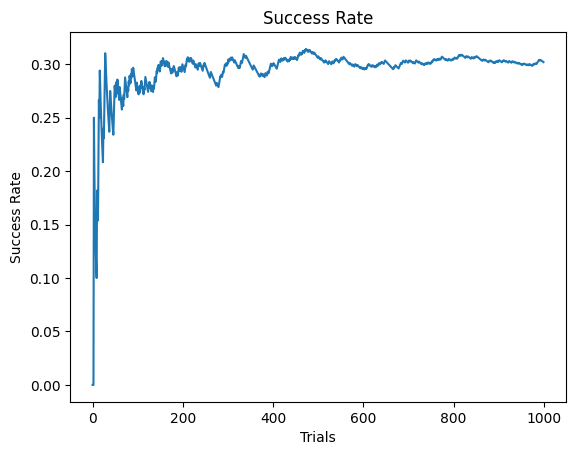

In [122]:
# Now we plot the success rate
df = pd.read_csv('100_50_1000.csv')
df['SuccessRate'].plot()
plt.title("Success Rate")
plt.xlabel("Trials")
plt.ylabel("Success Rate")
plt.show()


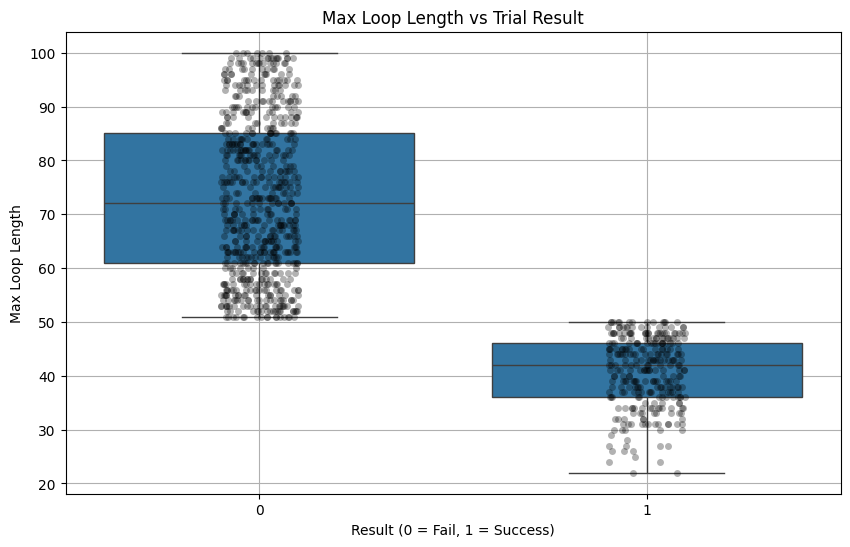

In [123]:
# Plot the correlation between max loop length and 1 - success 0 - fail
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Result', y='MaxLoopLength', whis=[0, 100], showfliers=False)
sns.stripplot(data=df, x='Result', y='MaxLoopLength', color='black', jitter=True, alpha=0.3)
plt.title("Max Loop Length vs Trial Result")
plt.xlabel("Result (0 = Fail, 1 = Success)")
plt.ylabel("Max Loop Length")
plt.grid(True)
plt.show()

In [124]:
print(prisionersRiddle(10, 5, 1000, "10_5_1000"))

✅ Success rate: 0.3420 (342/1000)
     Trial  Result                                            Mapping  \
0        0       0  {1: 2, 2: 10, 3: 7, 4: 9, 5: 1, 6: 4, 7: 8, 8:...   
1        1       1  {1: 10, 2: 7, 3: 9, 4: 6, 5: 8, 6: 4, 7: 1, 8:...   
2        2       1  {1: 8, 2: 7, 3: 4, 4: 6, 5: 5, 6: 3, 7: 10, 8:...   
3        3       0  {1: 8, 2: 1, 3: 2, 4: 9, 5: 7, 6: 6, 7: 4, 8: ...   
4        4       1  {1: 3, 2: 10, 3: 5, 4: 7, 5: 1, 6: 8, 7: 6, 8:...   
..     ...     ...                                                ...   
995    995       1  {1: 10, 2: 5, 3: 1, 4: 6, 5: 9, 6: 4, 7: 2, 8:...   
996    996       0  {1: 8, 2: 5, 3: 4, 4: 2, 5: 1, 6: 10, 7: 7, 8:...   
997    997       0  {1: 7, 2: 4, 3: 6, 4: 8, 5: 9, 6: 1, 7: 10, 8:...   
998    998       0  {1: 4, 2: 8, 3: 6, 4: 10, 5: 5, 6: 7, 7: 1, 8:...   
999    999       0  {1: 8, 2: 7, 3: 2, 4: 10, 5: 5, 6: 1, 7: 4, 8:...   

     NumberTries  SuccessRate  MaxLoopLength  MinLoopLength  \
0              5     0.000

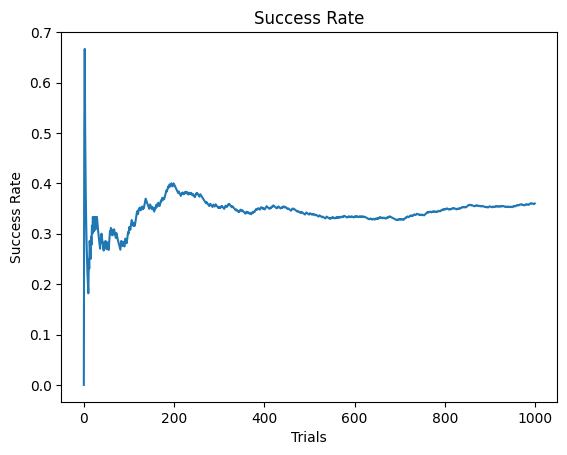

In [125]:
# Now we plot the success rate
df = pd.read_csv('solution.csv')
df['SuccessRate'].plot()
plt.title("Success Rate")
plt.xlabel("Trials")
plt.ylabel("Success Rate")
plt.show()


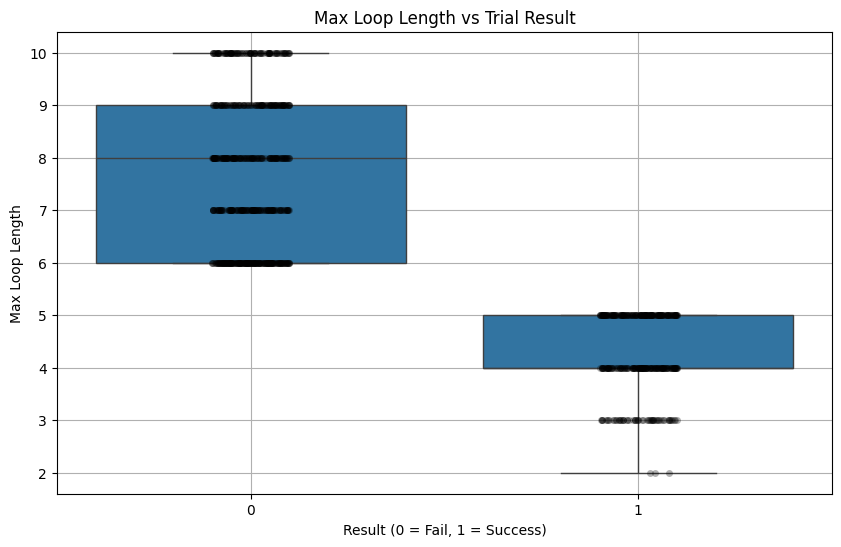

In [126]:
# Plot the correlation between max loop length and 1 - success 0 - fail
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Result', y='MaxLoopLength', whis=[0, 100], showfliers=False)
sns.stripplot(data=df, x='Result', y='MaxLoopLength', color='black', jitter=True, alpha=0.3)
plt.title("Max Loop Length vs Trial Result")
plt.xlabel("Result (0 = Fail, 1 = Success)")
plt.ylabel("Max Loop Length")
plt.grid(True)
plt.show()

In [127]:
print(prisionersRiddle(1000, 550, 1000,"1000_550_1000"))

✅ Success rate: 0.3890 (389/1000)
     Trial  Result                                            Mapping  \
0        0       1  {1: 717, 2: 32, 3: 580, 4: 759, 5: 791, 6: 847...   
1        1       0  {1: 887, 2: 795, 3: 403, 4: 762, 5: 775, 6: 36...   
2        2       0  {1: 719, 2: 783, 3: 845, 4: 221, 5: 390, 6: 34...   
3        3       1  {1: 764, 2: 403, 3: 307, 4: 614, 5: 157, 6: 76...   
4        4       1  {1: 416, 2: 989, 3: 519, 4: 586, 5: 800, 6: 43...   
..     ...     ...                                                ...   
995    995       0  {1: 849, 2: 977, 3: 487, 4: 124, 5: 949, 6: 59...   
996    996       1  {1: 296, 2: 130, 3: 370, 4: 503, 5: 157, 6: 45...   
997    997       1  {1: 713, 2: 974, 3: 930, 4: 571, 5: 894, 6: 82...   
998    998       0  {1: 236, 2: 506, 3: 140, 4: 162, 5: 747, 6: 29...   
999    999       0  {1: 22, 2: 788, 3: 913, 4: 402, 5: 727, 6: 537...   

     NumberTries  SuccessRate  MaxLoopLength  MinLoopLength  \
0            550     1.000

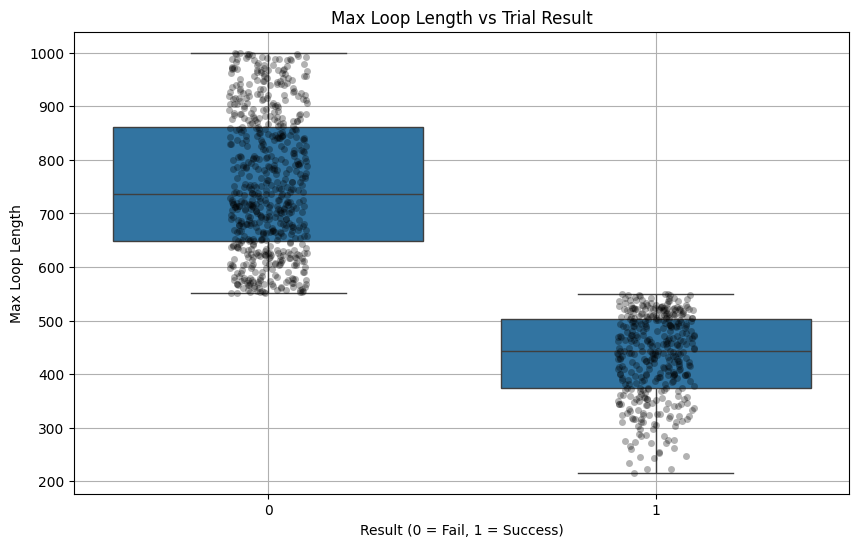

In [132]:
# Plot the correlation between max loop length and 1 - success 0 - fail
df = pd.read_csv('1000_550_1000.csv')
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Result', y='MaxLoopLength', whis=[0, 100], showfliers=False)
sns.stripplot(data=df, x='Result', y='MaxLoopLength', color='black', jitter=True, alpha=0.3)
plt.title("Max Loop Length vs Trial Result")
plt.xlabel("Result (0 = Fail, 1 = Success)")
plt.ylabel("Max Loop Length")
plt.grid(True)
plt.show()

✅ Success rate: 0.1990 (199/1000)
     Trial  Result                                            Mapping  \
0        0       0  {1: 240, 2: 288, 3: 614, 4: 350, 5: 241, 6: 59...   
1        1       0  {1: 270, 2: 566, 3: 308, 4: 404, 5: 496, 6: 95...   
2        2       1  {1: 892, 2: 899, 3: 148, 4: 564, 5: 123, 6: 60...   
3        3       0  {1: 733, 2: 541, 3: 802, 4: 53, 5: 571, 6: 847...   
4        4       0  {1: 742, 2: 349, 3: 491, 4: 792, 5: 156, 6: 48...   
..     ...     ...                                                ...   
995    995       1  {1: 433, 2: 846, 3: 224, 4: 718, 5: 375, 6: 99...   
996    996       1  {1: 959, 2: 354, 3: 2, 4: 632, 5: 133, 6: 220,...   
997    997       0  {1: 200, 2: 419, 3: 392, 4: 170, 5: 790, 6: 81...   
998    998       0  {1: 821, 2: 375, 3: 138, 4: 369, 5: 94, 6: 912...   
999    999       0  {1: 392, 2: 453, 3: 556, 4: 685, 5: 423, 6: 35...   

     NumberTries  SuccessRate  MaxLoopLength  MinLoopLength  \
0            450     0.000

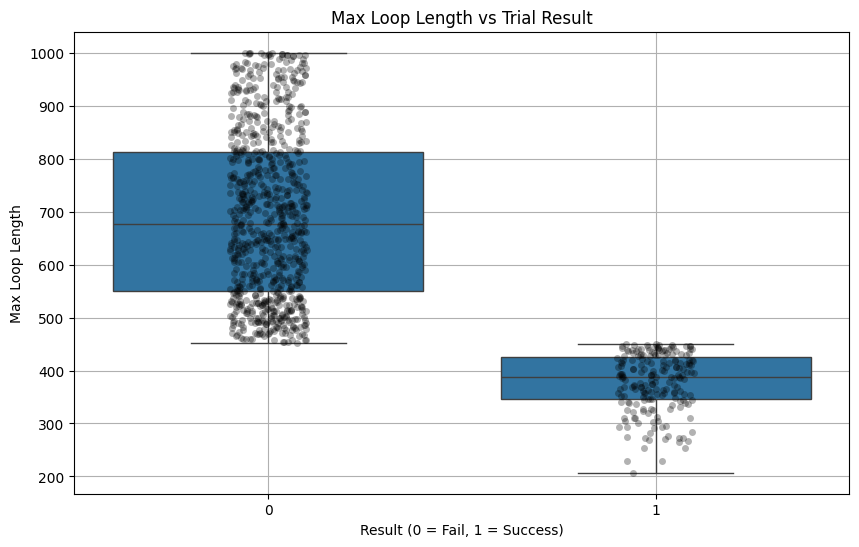

In [135]:
print(prisionersRiddle(1000, 450, 1000,"1000_450_1000"))
# Plot the correlation between max loop length and 1 - success 0 - fail
df = pd.read_csv('1000_450_1000.csv')
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Result', y='MaxLoopLength', whis=[0, 100], showfliers=False)
sns.stripplot(data=df, x='Result', y='MaxLoopLength', color='black', jitter=True, alpha=0.3)
plt.title("Max Loop Length vs Trial Result")
plt.xlabel("Result (0 = Fail, 1 = Success)")
plt.ylabel("Max Loop Length")
plt.grid(True)
plt.show()

In [ ]:
# Now lets look at the minimum number of tries necessary to solve the problem for 1000 prisioners

for j in reversed(range(200, 1000)):
    df = prisionersRiddle(1000, j, 1000, f"1000_{j}_1000")
    if df['SuccessRate'].iloc[-1] == 0.0:
        print(f"✅ Success rate: {df['SuccessRate'].iloc[-1]:.4f} ({df['SuccessRate'].iloc[-1]*100:.2f}%) with {j} tries")
        break
    

✅ Success rate: 0.9940 (994/1000)
✅ Success rate: 0.9810 (981/1000)
✅ Success rate: 0.9790 (979/1000)
✅ Success rate: 0.9670 (967/1000)
✅ Success rate: 0.9360 (936/1000)
✅ Success rate: 0.9530 (953/1000)
✅ Success rate: 0.9330 (933/1000)
✅ Success rate: 0.9100 (910/1000)
✅ Success rate: 0.9080 (908/1000)
✅ Success rate: 0.9020 (902/1000)
✅ Success rate: 0.8680 (868/1000)
✅ Success rate: 0.8760 (876/1000)
✅ Success rate: 0.8620 (862/1000)
✅ Success rate: 0.8470 (847/1000)
✅ Success rate: 0.8340 (834/1000)
✅ Success rate: 0.8360 (836/1000)
✅ Success rate: 0.8140 (814/1000)
✅ Success rate: 0.8000 (800/1000)
✅ Success rate: 0.8040 (804/1000)
✅ Success rate: 0.7770 (777/1000)
✅ Success rate: 0.7900 (790/1000)
✅ Success rate: 0.7760 (776/1000)
✅ Success rate: 0.7490 (749/1000)
✅ Success rate: 0.7070 (707/1000)
✅ Success rate: 0.6930 (693/1000)
✅ Success rate: 0.6950 (695/1000)
✅ Success rate: 0.6810 (681/1000)
✅ Success rate: 0.7020 (702/1000)
✅ Success rate: 0.6680 (668/1000)
✅ Success rate

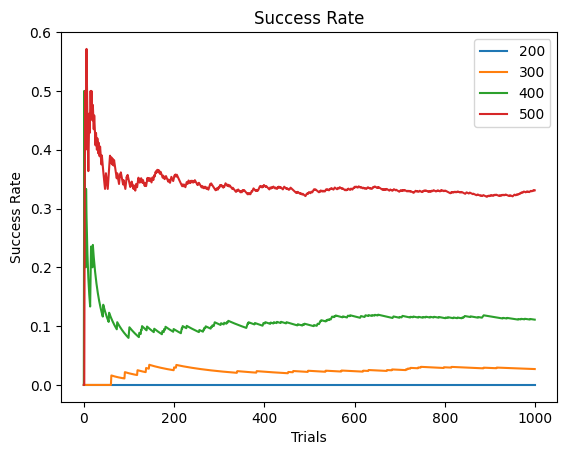

In [143]:
# Plot comparison of success rate vs number of tries
df = pd.read_csv('1000_200_1000.csv')
df['SuccessRate'].plot(label='200')
df = pd.read_csv('1000_300_1000.csv')
df['SuccessRate'].plot(label='300')
df = pd.read_csv('1000_400_1000.csv')
df['SuccessRate'].plot(label='400')
df = pd.read_csv('1000_500_1000.csv')
df['SuccessRate'].plot(label='500')
plt.title("Success Rate")
plt.xlabel("Trials")
plt.ylabel("Success Rate")
plt.legend()
